In [1]:
#Datitos - Tabla
import pandas as pd
import os

dt_distrit=pd.read_excel(os.path.join('data','dato_oficial_end2.xlsx'),
                     dtype={'Ubigeo': object})
dt_distrit.head()

,Ubigeo,Distrito,Provincia,Departamento,Poblacion,Superficie,Ingreso_Familiar_per_capita,Esperanza_de_vida_al_nacer,Porcentaje_secundaria_completa,Anhos_educacion_25a_mas
0,010101,Chachapoyas,Chachapoyas,Amazonas,29171,153.78,1086.762736,73.297544,74.699578,9.7582
1,010102,Asuncion,Chachapoyas,Amazonas,288,25.71,569.610318,72.349067,66.666667,5.8662
2,010103,Balsas,Chachapoyas,Amazonas,1644,357.09,362.999904,68.710568,30.769231,4.9866
3,010104,Cheto,Chachapoyas,Amazonas,591,56.97,342.569379,83.896326,49.019608,4.2735
4,010105,Chiliquin,Chachapoyas,Amazonas,687,143.43,308.814375,77.261089,34.615385,3.3040


In [2]:
# Mapa

os.environ['USE_PYGEOS'] = '0'

import geopandas as gpd

mp_distrit=gpd.read_file(os.path.join('maps','DistritosMap.zip'))

mp_distrit.head()

,DEPARTAMEN,PROVINCIA,DISTRITO,INSTITUCIO,geometry
0,TACNA,TACNA,CORONEL GREGORIO ALBARRACIN LANCHIPA,IGN,"POLYGON ((-70.17413 -18.12896, -70.17461 -18.1..."
1,TACNA,TACNA,POCOLLAY,IGN,"POLYGON ((-69.93475 -17.92557, -69.90467 -17.9..."
2,TACNA,TACNA,CALANA,IGN,"POLYGON ((-70.11604 -17.91106, -70.11457 -17.9..."
3,TACNA,TACNA,TACNA,IGN,"POLYGON ((-70.31490 -17.94498, -70.30682 -17.9..."
4,TACNA,TACNA,SAMA,IGN,"POLYGON ((-70.42497 -17.88934, -70.48022 -17.9..."


In [3]:
#Haciendo que la capitalización sea la misma
capitalizeColumns=lambda x: x.str.upper().str.strip()
dt_distrit[['Provincia','Distrito']]=dt_distrit[['Provincia','Distrito']].apply(capitalizeColumns)
mp_distrit[['PROVINCIA','DISTRITO']]=mp_distrit[['PROVINCIA','DISTRITO']].apply(capitalizeColumns)

dt_distrit.head()

,Ubigeo,Distrito,Provincia,Departamento,Poblacion,Superficie,Ingreso_Familiar_per_capita,Esperanza_de_vida_al_nacer,Porcentaje_secundaria_completa,Anhos_educacion_25a_mas
0,010101,CHACHAPOYAS,CHACHAPOYAS,Amazonas,29171,153.78,1086.762736,73.297544,74.699578,9.7582
1,010102,ASUNCION,CHACHAPOYAS,Amazonas,288,25.71,569.610318,72.349067,66.666667,5.8662
2,010103,BALSAS,CHACHAPOYAS,Amazonas,1644,357.09,362.999904,68.710568,30.769231,4.9866
3,010104,CHETO,CHACHAPOYAS,Amazonas,591,56.97,342.569379,83.896326,49.019608,4.2735
4,010105,CHILIQUIN,CHACHAPOYAS,Amazonas,687,143.43,308.814375,77.261089,34.615385,3.3040


In [4]:
#Quitando símbolos no necesarios 

import unidecode


byePunctuation=lambda x: unidecode.unidecode(x)
dt_distrit[['Provincia','Distrito']]=dt_distrit[['Provincia','Distrito']].applymap(byePunctuation)
mp_distrit[['PROVINCIA','DISTRITO']]=mp_distrit[['PROVINCIA','DISTRITO']].applymap(byePunctuation)

In [5]:
#Tamaño de los datos que tengo
len(dt_distrit.Distrito),len(mp_distrit.DISTRITO)

(1838, 1874)

In [6]:
#¿Hay duplicados?
dt_distrit.Distrito.duplicated().sum(),mp_distrit.DISTRITO.duplicated().sum()

(151, 152)

In [7]:
#Creamos una nueva columna llamada "provDist" y concatenamos
dt_distrit['provDist']=["+".join(pd) for pd in zip (dt_distrit.Provincia,dt_distrit.Distrito)]
mp_distrit['provDist']=["+".join(pd) for pd in zip (mp_distrit.PROVINCIA,mp_distrit.DISTRITO)]

In [8]:
# Tenemos:
dt_distrit['provDist'].head()

0    CHACHAPOYAS+CHACHAPOYAS
1       CHACHAPOYAS+ASUNCION
2         CHACHAPOYAS+BALSAS
3          CHACHAPOYAS+CHETO
4      CHACHAPOYAS+CHILIQUIN
Name: provDist, dtype: object

In [9]:
# Reemplazamos guiones y epacios por solo un espacio
dt_distrit.provDist=dt_distrit.provDist.str.replace("\-|\_|\s+"," ",regex=True)
mp_distrit.provDist=mp_distrit.provDist.str.replace("\-|\_|\s+"," ",regex=True)

In [10]:
#Ejercicio 1 - Merging

#¿Dónde no hay match?
nomatch_df=set(dt_distrit.provDist)- set(mp_distrit.provDist)
nomatch_gdf=set(mp_distrit.provDist)-set(dt_distrit.provDist) 

In [11]:
#Cantidad de notmatch
len(nomatch_df), len(nomatch_gdf)

(13, 49)

In [12]:
#Usamos fuzz para ver la coincidencia más cercana de nomatch_gdf para obtener un valor en nomatch_df
from thefuzz import process
[(dis,process.extractOne(dis,nomatch_gdf)) for dis in sorted(nomatch_df)]

[('ANGARAES+HUAYLLAY GRANDE', ('ANGARAES+HUALLAY GRANDE', 98)),
 ('AYMARAES+CARAYBAMBA', ('AYMARAES+CARAIBAMBA', 95)),
 ('AYMARAES+HUAYLLO', ('AYMARAES+IHUAYLLO', 97)),
 ('CALLAO+CARMEN DE LA LEGUA', ('CALLAO+CARMEN DE LA LEGUA REYNOSO', 95)),
 ('CARLOS FERMIN FITZCA+SAN LUIS', ('CARLOS FERMIN FITZCARRALD+SAN LUIS', 92)),
 ('CARLOS FERMIN FITZCA+SAN NICOLAS',
  ('CARLOS FERMIN FITZCARRALD+SAN NICOLAS', 93)),
 ('CARLOS FERMIN FITZCA+YAUYA', ('CARLOS FERMIN FITZCARRALD+YAUYA', 91)),
 ('HUARAZ+PAMPAS', ('HUARAZ+PAMPAS GRANDE', 90)),
 ('LEONCIO PRADO+DANIEL ALOMIAS ROBLES',
  ('LEONCIO PRADO+DANIEL ALOMIA ROBLES', 99)),
 ('LIMA+PUEBLO LIBRE', ('LEONCIO PRADO+PUEBLO NUEVO', 86)),
 ('MAYNAS+PUTUMAYO', ('PUTUMAYO+PUTUMAYO', 95)),
 ('MAYNAS+TENIENTE MANUEL CLAVERO', ('PUTUMAYO+TENIENTE MANUEL CLAVERO', 87)),
 ('SAN MARTIN+PAPAPLAYA', ('SAN MARTIN+PAPA PLAYA', 98))]

In [13]:
# Observamos el diccionario para hacer los cambios
{dis:process.extractOne(dis,nomatch_gdf)[0] for dis in sorted(nomatch_df)}

{'ANGARAES+HUAYLLAY GRANDE': 'ANGARAES+HUALLAY GRANDE',
 'AYMARAES+CARAYBAMBA': 'AYMARAES+CARAIBAMBA',
 'AYMARAES+HUAYLLO': 'AYMARAES+IHUAYLLO',
 'CALLAO+CARMEN DE LA LEGUA': 'CALLAO+CARMEN DE LA LEGUA REYNOSO',
 'CARLOS FERMIN FITZCA+SAN LUIS': 'CARLOS FERMIN FITZCARRALD+SAN LUIS',
 'CARLOS FERMIN FITZCA+SAN NICOLAS': 'CARLOS FERMIN FITZCARRALD+SAN NICOLAS',
 'CARLOS FERMIN FITZCA+YAUYA': 'CARLOS FERMIN FITZCARRALD+YAUYA',
 'HUARAZ+PAMPAS': 'HUARAZ+PAMPAS GRANDE',
 'LEONCIO PRADO+DANIEL ALOMIAS ROBLES': 'LEONCIO PRADO+DANIEL ALOMIA ROBLES',
 'LIMA+PUEBLO LIBRE': 'LEONCIO PRADO+PUEBLO NUEVO',
 'MAYNAS+PUTUMAYO': 'PUTUMAYO+PUTUMAYO',
 'MAYNAS+TENIENTE MANUEL CLAVERO': 'PUTUMAYO+TENIENTE MANUEL CLAVERO',
 'SAN MARTIN+PAPAPLAYA': 'SAN MARTIN+PAPA PLAYA'}

In [14]:
# Luego, tenemos:
changesDis_df={dis:process.extractOne(dis,nomatch_gdf)[0] for dis in sorted(nomatch_df)}

In [15]:
#Hacemos el reemplazo
dt_distrit.provDist.replace(changesDis_df,inplace=True)

In [16]:
#Finalmente, hacemos MERGE
mp_distrit=mp_distrit.merge(dt_distrit, on='provDist')

In [17]:
#Verificamos
mp_distrit.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1838 entries, 0 to 1837
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   DEPARTAMEN                      1838 non-null   object  
 1   PROVINCIA                       1838 non-null   object  
 2   DISTRITO                        1838 non-null   object  
 3   INSTITUCIO                      1838 non-null   object  
 4   geometry                        1838 non-null   geometry
 5   provDist                        1838 non-null   object  
 6   Ubigeo                          1838 non-null   object  
 7   Distrito                        1838 non-null   object  
 8   Provincia                       1838 non-null   object  
 9   Departamento                    1838 non-null   object  
 10  Poblacion                       1838 non-null   int64   
 11  Superficie                      1838 non-null   float64 
 12  Ingreso_Fami

In [18]:
#Eliminamos columnas duplicadas
bye=['Departamento', 'Provincia', 'Distrito','INSTITUCIO']
mp_distrit.drop(columns=bye,inplace=True)

#Observamos
mp_distrit.head()

,DEPARTAMEN,PROVINCIA,DISTRITO,geometry,provDist,Ubigeo,Poblacion,Superficie,Ingreso_Familiar_per_capita,Esperanza_de_vida_al_nacer,Porcentaje_secundaria_completa,Anhos_educacion_25a_mas
0,TACNA,TACNA,CORONEL GREGORIO ALBARRACIN LANCHIPA,"POLYGON ((-70.17413 -18.12896, -70.17461 -18.1...",TACNA+CORONEL GREGORIO ALBARRACIN LANCHIPA,220113,123662,187.74,741.974186,84.912042,43.426295,5.3083
1,TACNA,TACNA,POCOLLAY,"POLYGON ((-69.93475 -17.92557, -69.90467 -17.9...",TACNA+POCOLLAY,220109,22319,265.65,899.819705,80.783959,54.347826,6.3572
2,TACNA,TACNA,CALANA,"POLYGON ((-70.11604 -17.91106, -70.11457 -17.9...",TACNA+CALANA,220102,3338,108.38,942.645376,77.779319,49.671485,7.4012
3,TACNA,TACNA,TACNA,"POLYGON ((-70.31490 -17.94498, -70.30682 -17.9...",TACNA+TACNA,220101,80845,1877.78,565.839511,76.398105,38.381201,4.5882
4,TACNA,TACNA,SAMA,"POLYGON ((-70.42497 -17.88934, -70.48022 -17.9...",TACNA+SAMA,220110,2679,1115.98,826.874437,82.035319,44.943820,5.7789


In [19]:
#Filtramos un departamento - Arequipa
#Observamos
mp_distrit[mp_distrit.DEPARTAMEN.str.contains('AREQUIPA')]

,DEPARTAMEN,PROVINCIA,DISTRITO,geometry,provDist,Ubigeo,Poblacion,Superficie,Ingreso_Familiar_per_capita,Esperanza_de_vida_al_nacer,Porcentaje_secundaria_completa,Anhos_educacion_25a_mas
27,AREQUIPA,ISLAY,PUNTA DE BOMBON,"POLYGON ((-71.32318 -17.05225, -71.43909 -17.2...",ISLAY+PUNTA DE BOMBON,040706,6444,769.60,1135.732524,79.793396,80.101180,8.2341
30,AREQUIPA,ISLAY,DEAN VALDIVIA,"POLYGON ((-71.80896 -17.03371, -71.80810 -17.0...",ISLAY+DEAN VALDIVIA,040703,6703,134.08,316.567898,85.016346,65.000000,4.6110
32,AREQUIPA,ISLAY,MEJIA,"POLYGON ((-71.82570 -16.96833, -71.82384 -16.9...",ISLAY+MEJIA,040705,1014,100.78,1086.094297,74.155485,77.939464,10.0538
39,AREQUIPA,ISLAY,COCACHACRA,"POLYGON ((-71.61783 -16.68254, -71.61682 -16.6...",ISLAY+COCACHACRA,040702,8901,1536.96,1389.976690,74.712602,68.987342,8.4502
40,AREQUIPA,ISLAY,ISLAY,"POLYGON ((-72.30945 -16.68454, -72.30887 -16.6...",ISLAY+ISLAY,040704,7851,383.78,1197.345279,84.009356,57.281553,7.1065
...,...,...,...,...,...,...,...,...,...,...,...,...
243,AREQUIPA,LA UNION,PAMPAMARCA,"POLYGON ((-72.95207 -14.79681, -72.95127 -14.7...",LA UNION+PAMPAMARCA,040805,1231,782.17,852.897830,81.217677,47.093023,8.4403
244,AREQUIPA,CAYLLOMA,CAYLLOMA,"POLYGON ((-71.86855 -14.83311, -71.86860 -14.8...",CAYLLOMA+CAYLLOMA,040204,3021,1499.00,1196.542386,79.570828,83.831394,12.3294
258,AREQUIPA,LA UNION,PUYCA,"POLYGON ((-72.46638 -14.66477, -72.46551 -14.6...",LA UNION+PUYCA,040806,2797,1501.20,382.650457,95.740983,22.535211,4.5703
260,AREQUIPA,LA UNION,HUAYNACOTAS,"POLYGON ((-72.72526 -14.64399, -72.72586 -14.6...",LA UNION+HUAYNACOTAS,040804,2207,932.64,1094.011433,78.571734,76.315789,7.8402


In [20]:
#El departamento 
mp_distrit_AREQUIPA=mp_distrit[mp_distrit.DEPARTAMEN.str.contains('AREQUIPA')]
mp_distrit_AREQUIPA.head()

,DEPARTAMEN,PROVINCIA,DISTRITO,geometry,provDist,Ubigeo,Poblacion,Superficie,Ingreso_Familiar_per_capita,Esperanza_de_vida_al_nacer,Porcentaje_secundaria_completa,Anhos_educacion_25a_mas
27,AREQUIPA,ISLAY,PUNTA DE BOMBON,"POLYGON ((-71.32318 -17.05225, -71.43909 -17.2...",ISLAY+PUNTA DE BOMBON,040706,6444,769.60,1135.732524,79.793396,80.101180,8.2341
30,AREQUIPA,ISLAY,DEAN VALDIVIA,"POLYGON ((-71.80896 -17.03371, -71.80810 -17.0...",ISLAY+DEAN VALDIVIA,040703,6703,134.08,316.567898,85.016346,65.000000,4.6110
32,AREQUIPA,ISLAY,MEJIA,"POLYGON ((-71.82570 -16.96833, -71.82384 -16.9...",ISLAY+MEJIA,040705,1014,100.78,1086.094297,74.155485,77.939464,10.0538
39,AREQUIPA,ISLAY,COCACHACRA,"POLYGON ((-71.61783 -16.68254, -71.61682 -16.6...",ISLAY+COCACHACRA,040702,8901,1536.96,1389.976690,74.712602,68.987342,8.4502
40,AREQUIPA,ISLAY,ISLAY,"POLYGON ((-72.30945 -16.68454, -72.30887 -16.6...",ISLAY+ISLAY,040704,7851,383.78,1197.345279,84.009356,57.281553,7.1065


In [21]:
#Lo guardamos
mp_distrit_AREQUIPA.to_file(os.path.join('maps',"dataMapArequipa.gpkg"), layer='distritos', driver="GPKG")

In [22]:
#Ejercicio 2

#Estadística
mp_distrit_AREQUIPA.Ingreso_Familiar_per_capita.describe()

count     109.000000
mean      916.759409
std       303.953204
min       120.491176
25%       700.605774
50%       976.589821
75%      1113.193372
max      1691.462631
Name: Ingreso_Familiar_per_capita, dtype: float64

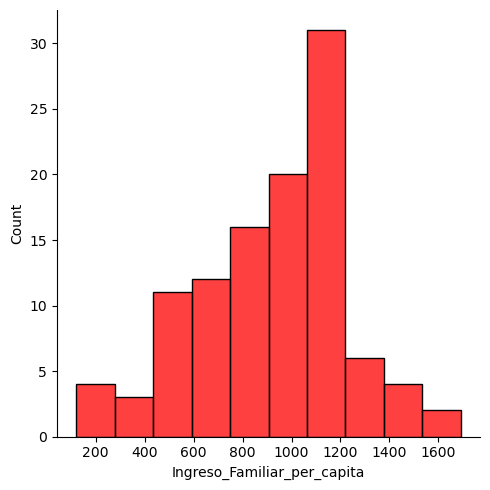

In [23]:
#Observamos el histograma y notamos que no podemos ver los datos atípicos, escogemos otro gráfico
import seaborn as sea

sea.displot(mp_distrit_AREQUIPA.Ingreso_Familiar_per_capita, color='red')

<Axes: xlabel='Ingreso_Familiar_per_capita'>

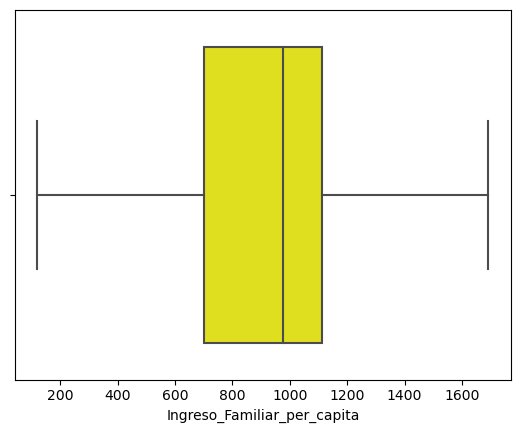

In [24]:
#Otro gráfico - no hay valores atípicos
sea.boxplot(data=mp_distrit_AREQUIPA, x='Ingreso_Familiar_per_capita', color='yellow')

In [25]:
#Observamos otras posibilidades
import mapclassify 
import numpy as np

np.random.seed(12345) 

#Usamos 5 intervalos
K=5
#Mismo ancho de intervalo
ei5 = mapclassify.EqualInterval(mp_distrit_AREQUIPA['Ingreso_Familiar_per_capita'], k=K)
#Basado en la desviación estándar
msd = mapclassify.StdMean(mp_distrit_AREQUIPA['Ingreso_Familiar_per_capita'])
#Cuantiles                             
q5=mapclassify.Quantiles(mp_distrit_AREQUIPA['Ingreso_Familiar_per_capita'],k=K)

#Bassado en la similaridad, para data multimodal 
mb5 = mapclassify.MaximumBreaks(mp_distrit_AREQUIPA['Ingreso_Familiar_per_capita'], k=K)
#Datos sesgados
ht = mapclassify.HeadTailBreaks(mp_distrit_AREQUIPA['Ingreso_Familiar_per_capita']) # No se necesita K
# Optimizando 
fj5 = mapclassify.FisherJenks(mp_distrit_AREQUIPA['Ingreso_Familiar_per_capita'], k=K)
# Optimizando 
jc5 = mapclassify.JenksCaspall(mp_distrit_AREQUIPA['Ingreso_Familiar_per_capita'], k=K)
# Optimizando 
mp5 = mapclassify.MaxP(mp_distrit_AREQUIPA['Ingreso_Familiar_per_capita'], k=K)   

In [26]:
# Tabla de frecuencias default
ht

HeadTailBreaks

     Interval        Count
--------------------------
[ 120.49,  916.76] |    47
( 916.76, 1133.35] |    37
(1133.35, 1269.18] |    17
(1269.18, 1431.56] |     6
(1431.56, 1621.53] |     1
(1621.53, 1691.46] |     1

In [27]:
#¿En qué grupo está cada fila?
ht.yb

array([2, 0, 1, 3, 2, 0, 4, 0, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 2, 1, 2, 0,
       1, 1, 0, 0, 0, 2, 0, 1, 1, 0, 1, 1, 2, 0, 0, 1, 0, 0, 3, 2, 2, 1,
       2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 2, 1, 0, 1, 2, 0, 0, 3,
       0, 1, 2, 3, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 2, 0, 0, 0,
       1, 0, 0, 5, 2, 1, 0, 1, 0, 0, 3, 0, 1, 3, 0, 0, 0, 2, 0, 1, 1])

In [28]:
#Etiquetas y recuentos
np.unique(ht.yb,return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([47, 37, 17,  6,  1,  1], dtype=int64))

In [29]:
# ht.yb en panda series

pd.Series(ht.yb).value_counts()

0    47
1    37
2    17
3     6
4     1
5     1
dtype: int64

In [30]:
# Estamos viendo los cortes pero sin los valores mínimos 
# ¿Dónde hiciste el corte? te dice solo el último valor (el máx), pero no te dice el mínimo. 
ht.bins

array([ 916.75940935, 1133.34987579, 1269.17676344, 1431.55757502,
       1621.52891071, 1691.46263105])

In [31]:
#Completando los bins
HT_bins=list(ht.bins)
HT_bins.insert(0,mp_distrit_AREQUIPA.Ingreso_Familiar_per_capita.min())

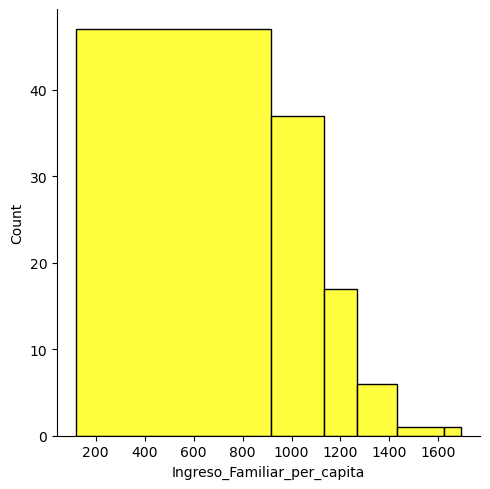

In [32]:
#Observamos el histograma completo
sea.displot(mp_distrit_AREQUIPA.Ingreso_Familiar_per_capita, bins=HT_bins,color='yellow')

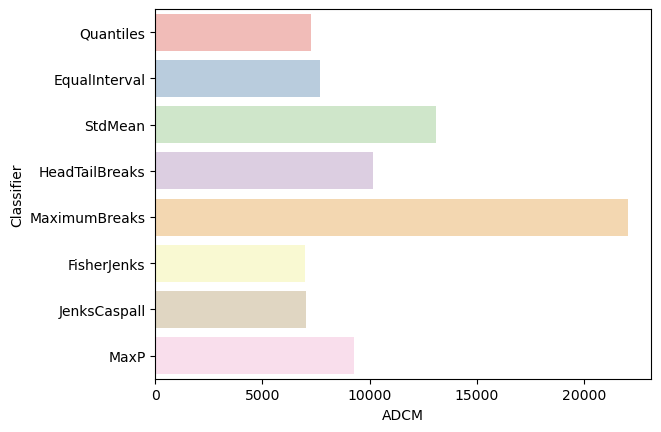

In [33]:
#ADCM - Identificar los 3 con menor error
class5 = q5, ei5,msd, ht, mb5, fj5, jc5, mp5
# Recopilar ADCM para cada clasificador
fits = np.array([ c.adcm for c in class5])
# Convertir clasificadores de ADCM en un DataFrame
adcms = pd.DataFrame(fits)
# Añadiendo nombres
adcms['classifier'] = [c.name for c in class5]
# Añadiendo el nombre de las columnas
adcms.columns = ['ADCM', 'Classifier']
ax = sea.barplot(
    y='Classifier', x='ADCM', data=adcms, palette='Pastel1'
)

In [34]:
mp_distrit_AREQUIPA.loc[:, 'QU'] = q5.yb
mp_distrit_AREQUIPA.loc[:, 'FJ'] = fj5.yb
mp_distrit_AREQUIPA.loc[:, 'JC'] = jc5.yb

C:\Users\lizbe\anaconda3\envs\geopandas_env\Lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\lizbe\anaconda3\envs\geopandas_env\Lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\lizbe\anaconda3\envs\geopandas_env\Lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [35]:
# Casos por esquema

class5new =  q5,fj5, jc5
pd.DataFrame(
    {c.name: c.counts for c in class5new},
    index=['Class-{}'.format(i) for i in range(5)]
)

,Quantiles,FisherJenks,JenksCaspall
Class-0,22,7,24
Class-1,22,21,20
Class-2,21,31,17
Class-3,22,42,28
Class-4,22,8,20


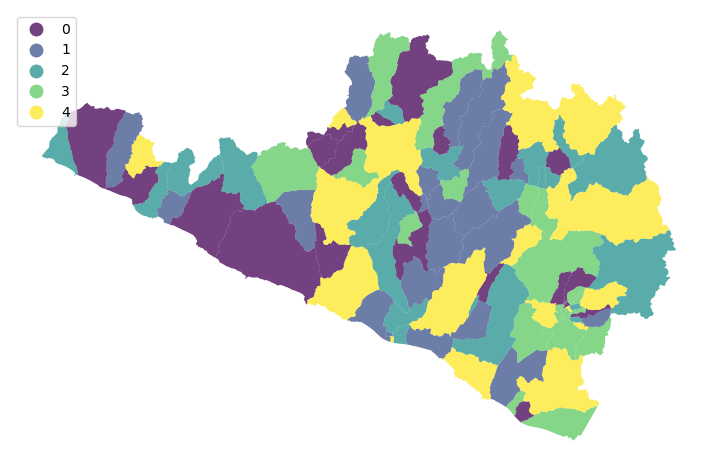

In [36]:
#Iniciamos con las mapas - Para cuantiles

import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(9, 9))
mp_distrit_AREQUIPA.plot(column='QU', 
        cmap='viridis', 
        categorical=True,
        edgecolor='white', 
        linewidth=0., 
        alpha=0.75, 
        legend=True,
        legend_kwds=dict(loc=2),
        ax=ax
       )

ax.set_axis_off()

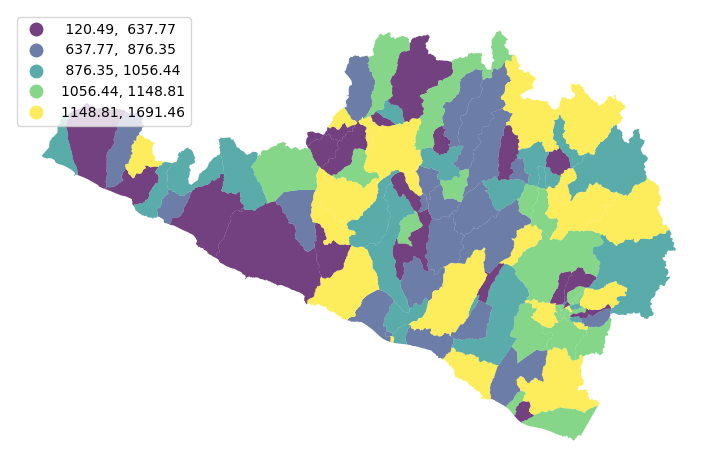

In [37]:
f, ax = plt.subplots(1, figsize=(9, 9))
mp_distrit_AREQUIPA.plot(column='Ingreso_Familiar_per_capita', 
        cmap='viridis',       
        scheme='Quantiles',
        k=5, 
        edgecolor='white', 
        linewidth=0., 
        alpha=0.75, 
        legend=True,
        legend_kwds=dict(loc=2),
        ax=ax
       )

ax.set_axis_off()


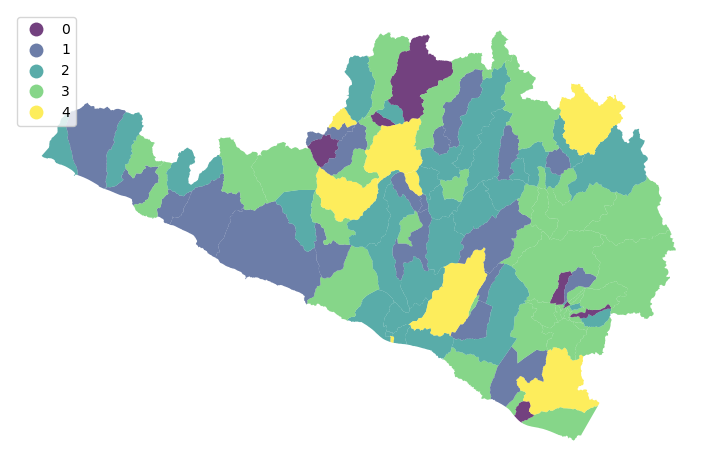

In [38]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(9, 9))
mp_distrit_AREQUIPA.plot(column='FJ', 
        cmap='viridis', 
        categorical=True,
        edgecolor='white', 
        linewidth=0., 
        alpha=0.75, 
        legend=True,
        legend_kwds=dict(loc=2),
        ax=ax
       )

ax.set_axis_off()

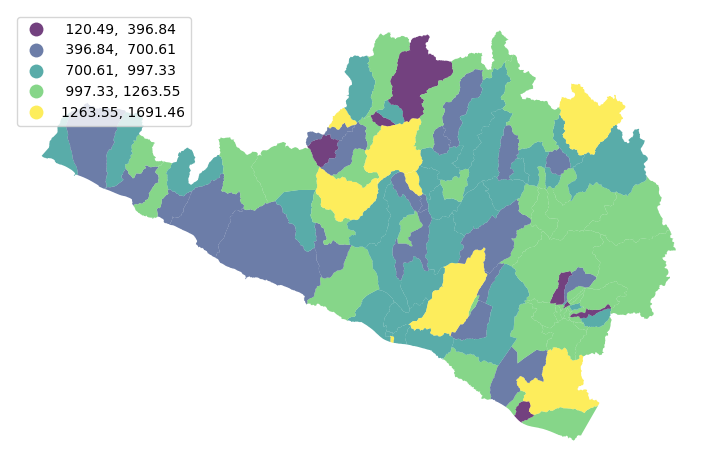

In [39]:
f, ax = plt.subplots(1, figsize=(9, 9))
mp_distrit_AREQUIPA.plot(column='Ingreso_Familiar_per_capita', 
        cmap='viridis',       
        scheme='FisherJenks',
        k=5, 
        edgecolor='white', 
        linewidth=0., 
        alpha=0.75, 
        legend=True,
        legend_kwds=dict(loc=2),
        ax=ax
       )

ax.set_axis_off()

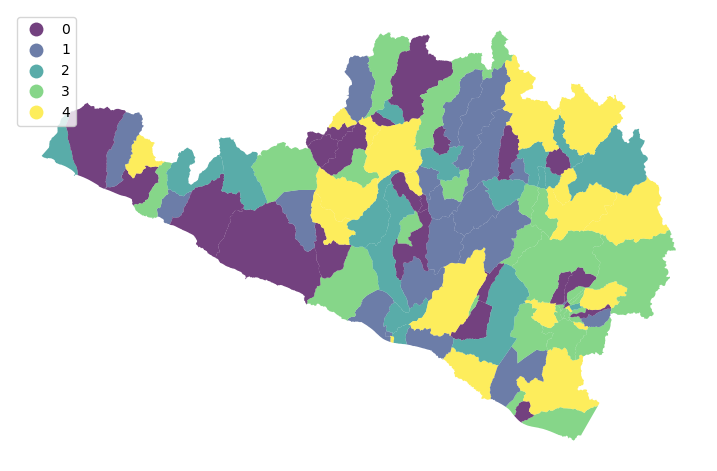

In [40]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(9, 9))
mp_distrit_AREQUIPA.plot(column='JC', 
        cmap='viridis', 
        categorical=True,
        edgecolor='white', 
        linewidth=0., 
        alpha=0.75, 
        legend=True,
        legend_kwds=dict(loc=2),
        ax=ax
       )

ax.set_axis_off()

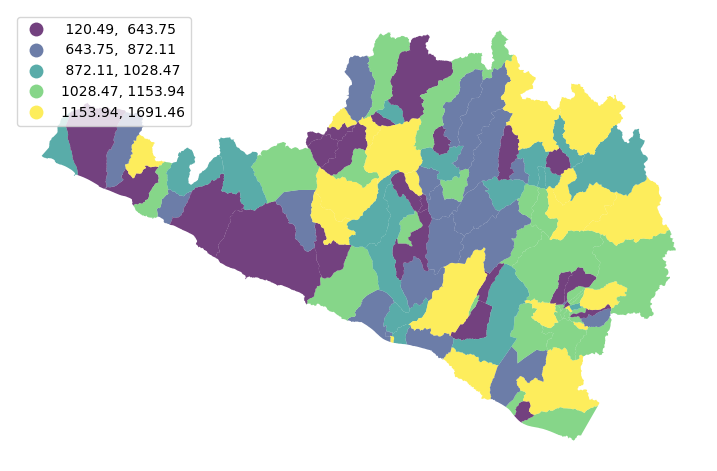

In [41]:
f, ax = plt.subplots(1, figsize=(9, 9))
mp_distrit_AREQUIPA.plot(column='Ingreso_Familiar_per_capita', 
        cmap='viridis',       
        scheme='JenksCaspall',
        k=5, 
        edgecolor='white', 
        linewidth=0., 
        alpha=0.75, 
        legend=True,
        legend_kwds=dict(loc=2),
        ax=ax
       )

ax.set_axis_off()

In [42]:
# Subimos los mapas
mp_distrit_AREQUIPA.to_file(os.path.join('maps',"dataMapArequipa.gpkg"), layer='distritos', driver="GPKG")

In [43]:
# Vemos que obtenemos 

mp_distrit_AREQUIPA.head()

,DEPARTAMEN,PROVINCIA,DISTRITO,geometry,provDist,Ubigeo,Poblacion,Superficie,Ingreso_Familiar_per_capita,Esperanza_de_vida_al_nacer,Porcentaje_secundaria_completa,Anhos_educacion_25a_mas,QU,FJ,JC
27,AREQUIPA,ISLAY,PUNTA DE BOMBON,"POLYGON ((-71.32318 -17.05225, -71.43909 -17.2...",ISLAY+PUNTA DE BOMBON,040706,6444,769.60,1135.732524,79.793396,80.101180,8.2341,3,3,3
30,AREQUIPA,ISLAY,DEAN VALDIVIA,"POLYGON ((-71.80896 -17.03371, -71.80810 -17.0...",ISLAY+DEAN VALDIVIA,040703,6703,134.08,316.567898,85.016346,65.000000,4.6110,0,0,0
32,AREQUIPA,ISLAY,MEJIA,"POLYGON ((-71.82570 -16.96833, -71.82384 -16.9...",ISLAY+MEJIA,040705,1014,100.78,1086.094297,74.155485,77.939464,10.0538,3,3,3
39,AREQUIPA,ISLAY,COCACHACRA,"POLYGON ((-71.61783 -16.68254, -71.61682 -16.6...",ISLAY+COCACHACRA,040702,8901,1536.96,1389.976690,74.712602,68.987342,8.4502,4,4,4
40,AREQUIPA,ISLAY,ISLAY,"POLYGON ((-72.30945 -16.68454, -72.30887 -16.6...",ISLAY+ISLAY,040704,7851,383.78,1197.345279,84.009356,57.281553,7.1065,4,3,4


In [44]:
#Ejercicio 3

#Seleccionamos 3 variables

sel_var = ['Esperanza_de_vida_al_nacer',
                     'Porcentaje_secundaria_completa', 
                     'Anhos_educacion_25a_mas']
mp_distrit_AREQUIPA[sel_var].describe()

,Esperanza_de_vida_al_nacer,Porcentaje_secundaria_completa,Anhos_educacion_25a_mas
count,109.000000,109.000000,109.000000
mean,80.694969,61.454931,7.748332
std,6.684134,15.331852,1.976261
min,56.570800,18.750000,2.773400
25%,76.627100,50.000000,6.572200
50%,79.590312,62.280702,7.840200
75%,85.016346,75.000000,8.815800
max,96.179348,84.623270,13.516300


<Axes: >

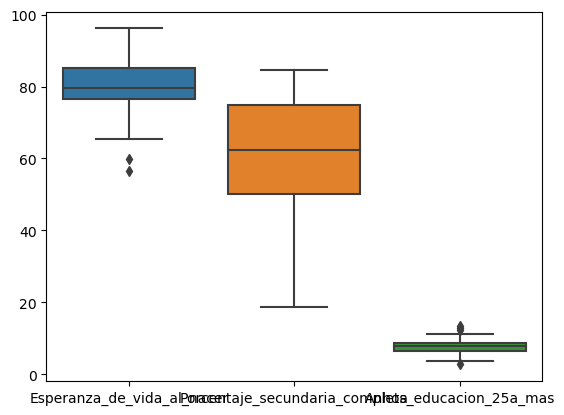

In [45]:
#Graficamos el boxplot para observar si existen datos atípicos

sea.boxplot(mp_distrit_AREQUIPA[sel_var])

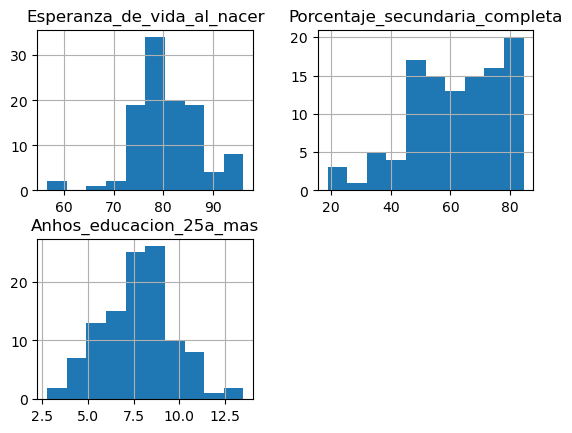

In [46]:
#Visualizamos lo que tenemos 

mp_distrit_AREQUIPA[sel_var].hist();

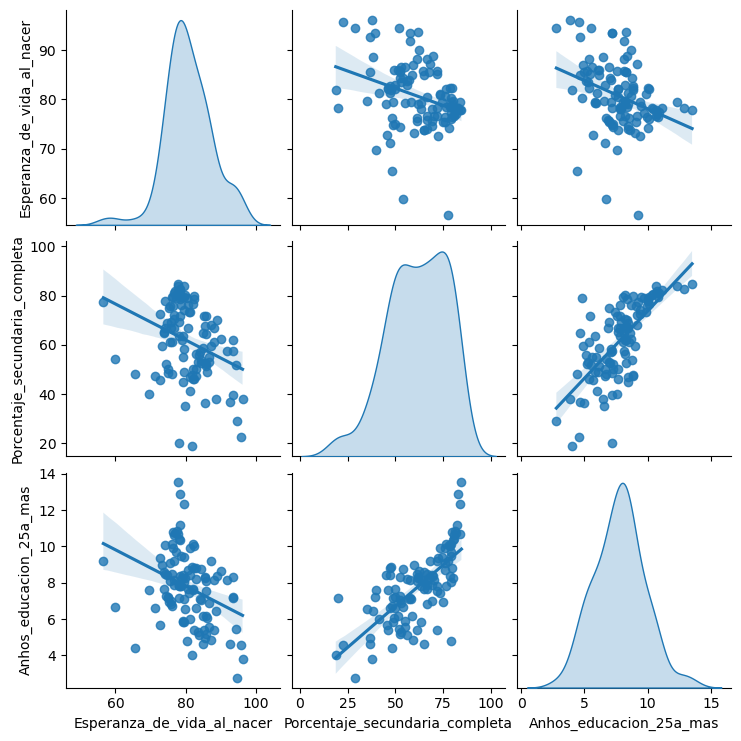

In [47]:
#Observamos la correlación

sea.pairplot(
    mp_distrit_AREQUIPA[sel_var], kind="reg", diag_kind="kde"
)

C:\Users\lizbe\anaconda3\envs\geopandas_env\Lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


<Axes: >

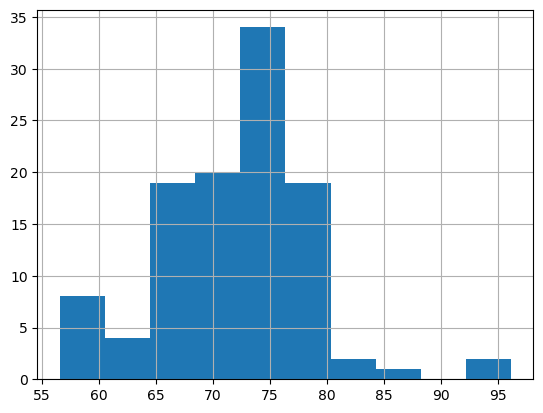

In [48]:
#Hacemos reverse para la variable que hace la correlación negativa

reverse=lambda x:abs(x-x.max())+x.min()

mp_distrit_AREQUIPA['Esperanza_de_vida_al_nacer_NO']=reverse(mp_distrit_AREQUIPA['Esperanza_de_vida_al_nacer'])
mp_distrit_AREQUIPA['Esperanza_de_vida_al_nacer_NO'].hist()

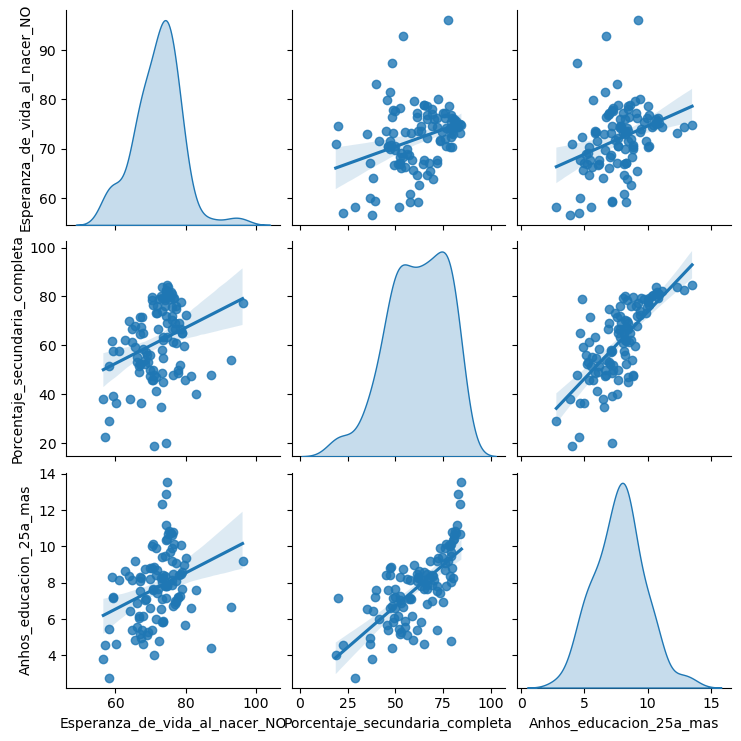

In [49]:
#Verificamos

sel_var_new = ['Esperanza_de_vida_al_nacer_NO',
                     'Porcentaje_secundaria_completa', 
                     'Anhos_educacion_25a_mas']
sea.pairplot(
   mp_distrit_AREQUIPA[sel_var_new], kind="reg", diag_kind="kde"
)

In [50]:
#Como todo es positivo, ya no necesitamos revertir variables
#Suavizamos los atípicos

columnsToScale=sel_var


from sklearn.preprocessing import robust_scale as rs
from sklearn.preprocessing import power_transform as pt
from sklearn.preprocessing import quantile_transform as qt

rs_result=rs(mp_distrit_AREQUIPA[columnsToScale])
pt_result=pt(mp_distrit_AREQUIPA[columnsToScale])
qt_result=qt(mp_distrit_AREQUIPA[columnsToScale])

C:\Users\lizbe\anaconda3\envs\geopandas_env\Lib\site-packages\sklearn\preprocessing\_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (109). n_quantiles is set to n_samples.
  warnings.warn(


<Axes: >

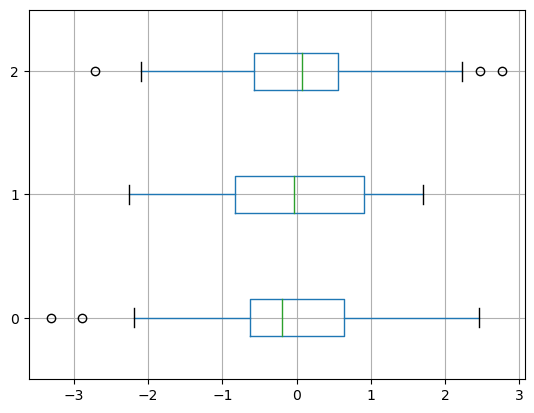

In [51]:
#Observamos
pd.DataFrame(pt_result).boxplot(vert=False)

<Axes: >

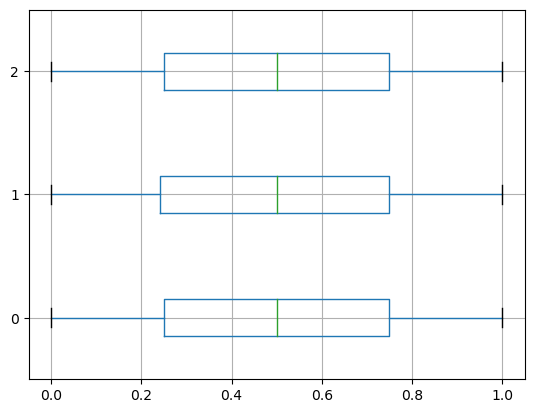

In [52]:
pd.DataFrame(qt_result).boxplot(vert=False)

<Axes: >

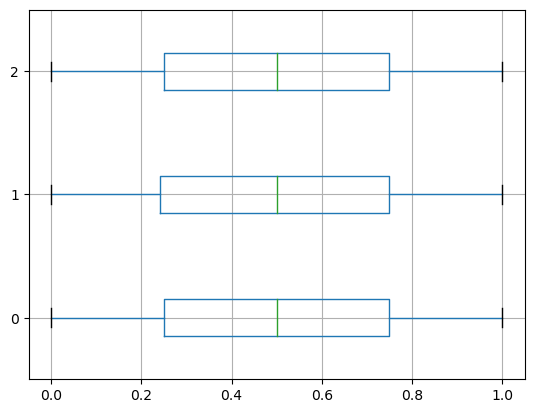

In [53]:
#Decidimos optar por este
pd.DataFrame(qt_result).boxplot(vert=False)

In [54]:
# Nuevos nombres
sel_var_new_t=[s+'_t' for s in sel_var_new]

# Añadimos columnas
mp_distrit_AREQUIPA[sel_var_new_t]=qt_result

C:\Users\lizbe\anaconda3\envs\geopandas_env\Lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\lizbe\anaconda3\envs\geopandas_env\Lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\lizbe\anaconda3\envs\geopandas_env\Lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [55]:
#Necesitamos escoger esquema para las variables 
#Observamos para la variables "Esperanza_de_vida_al_nacer"
np.random.seed(12345)

K=5
ei5_ev = mapclassify.EqualInterval(mp_distrit_AREQUIPA['Esperanza_de_vida_al_nacer'], k=K)
msd_ev = mapclassify.StdMean(mp_distrit_AREQUIPA['Esperanza_de_vida_al_nacer'])                             
q5_ev=mapclassify.Quantiles(mp_distrit_AREQUIPA['Esperanza_de_vida_al_nacer'],k=K)

mb5_ev = mapclassify.MaximumBreaks(mp_distrit_AREQUIPA['Esperanza_de_vida_al_nacer'], k=K)

ht_ev = mapclassify.HeadTailBreaks(mp_distrit_AREQUIPA['Esperanza_de_vida_al_nacer']) 

fj5_ev = mapclassify.FisherJenks(mp_distrit_AREQUIPA['Esperanza_de_vida_al_nacer'], k=K)

jc5_ev = mapclassify.JenksCaspall(mp_distrit_AREQUIPA['Esperanza_de_vida_al_nacer'], k=K)

mp5_ev = mapclassify.MaxP(mp_distrit_AREQUIPA['Esperanza_de_vida_al_nacer'], k=K)   

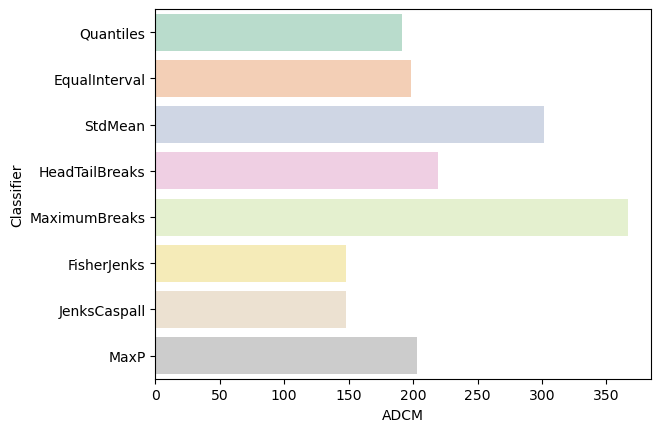

In [56]:
#Graficamos

class5_ev = q5_ev, ei5_ev,msd_ev, ht_ev, mb5_ev, fj5_ev, jc5_ev, mp5_ev

fits_ev = np.array([ c.adcm for c in class5_ev])

adcms_ev = pd.DataFrame(fits_ev)

adcms_ev['classifier'] = [c.name for c in class5_ev]

adcms_ev.columns = ['ADCM', 'Classifier']
ax = sea.barplot(
    y='Classifier', x='ADCM', data=adcms_ev, palette='Pastel2'
)

In [57]:
#Necesitamos escoger esquema para las variables 
#Observamos para la variables "Porcentaje_secundaria_completa"

np.random.seed(12345)

K=5

ei5_ps = mapclassify.EqualInterval(mp_distrit_AREQUIPA['Porcentaje_secundaria_completa'], k=K)

msd_ps = mapclassify.StdMean(mp_distrit_AREQUIPA['Porcentaje_secundaria_completa'])
                             
q5_ps=mapclassify.Quantiles(mp_distrit_AREQUIPA['Porcentaje_secundaria_completa'],k=K)


mb5_ps = mapclassify.MaximumBreaks(mp_distrit_AREQUIPA['Porcentaje_secundaria_completa'], k=K)

ht_ps = mapclassify.HeadTailBreaks(mp_distrit_AREQUIPA['Porcentaje_secundaria_completa'])

fj5_ps = mapclassify.FisherJenks(mp_distrit_AREQUIPA['Porcentaje_secundaria_completa'], k=K)

jc5_ps = mapclassify.JenksCaspall(mp_distrit_AREQUIPA['Porcentaje_secundaria_completa'], k=K)

mp5_ps = mapclassify.MaxP(mp_distrit_AREQUIPA['Porcentaje_secundaria_completa'], k=K)   

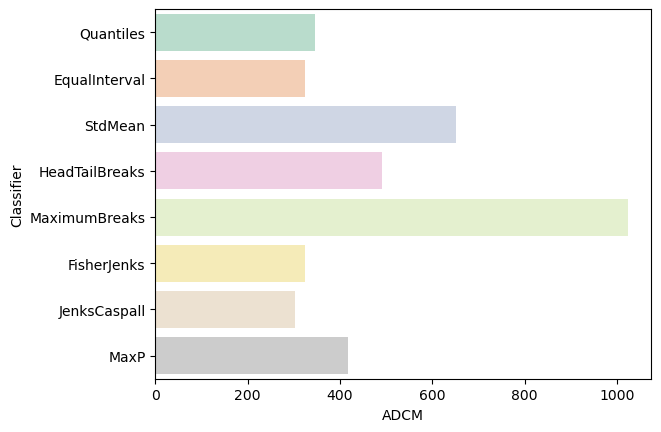

In [58]:
#Graficamos

class5_ps = q5_ps, ei5_ps,msd_ps, ht_ps, mb5_ps, fj5_ps, jc5_ps, mp5_ps

fits_ps = np.array([ c.adcm for c in class5_ps])

adcms_ps = pd.DataFrame(fits_ps)

adcms_ps['classifier'] = [c.name for c in class5_ps]

adcms_ps.columns = ['ADCM', 'Classifier']
ax = sea.barplot(
    y='Classifier', x='ADCM', data=adcms_ps, palette='Pastel2'
)

In [59]:
#Necesitamos escoger esquema para las variables 
#Observamos para la variables "Anhos_educacion_25a_mas"

np.random.seed(12345) 


K=5

ei5_ae = mapclassify.EqualInterval(mp_distrit_AREQUIPA['Anhos_educacion_25a_mas'], k=K)

msd_ae = mapclassify.StdMean(mp_distrit_AREQUIPA['Anhos_educacion_25a_mas'])
                            
q5_ae=mapclassify.Quantiles(mp_distrit_AREQUIPA['Anhos_educacion_25a_mas'],k=K)


mb5_ae = mapclassify.MaximumBreaks(mp_distrit_AREQUIPA['Anhos_educacion_25a_mas'], k=K)

ht_ae = mapclassify.HeadTailBreaks(mp_distrit_AREQUIPA['Anhos_educacion_25a_mas']) 

fj5_ae = mapclassify.FisherJenks(mp_distrit_AREQUIPA['Anhos_educacion_25a_mas'], k=K)

jc5_ae = mapclassify.JenksCaspall(mp_distrit_AREQUIPA['Anhos_educacion_25a_mas'], k=K)

mp5_ae = mapclassify.MaxP(mp_distrit_AREQUIPA['Anhos_educacion_25a_mas'], k=K)   

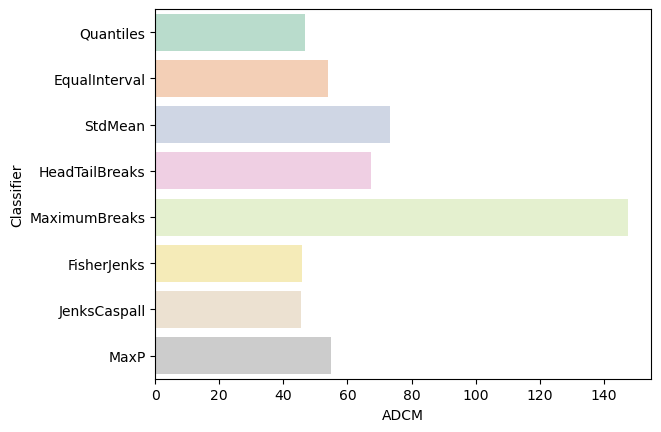

In [60]:
#Graficamos

class5_ae = q5_ae, ei5_ae,msd_ae, ht_ae, mb5_ae, fj5_ae, jc5_ae, mp5_ae

fits_ae = np.array([ c.adcm for c in class5_ae])

adcms_ae = pd.DataFrame(fits_ae)

adcms_ae['classifier'] = [c.name for c in class5_ae]

adcms_ae.columns = ['ADCM', 'Classifier']
ax = sea.barplot(
    y='Classifier', x='ADCM', data=adcms_ae, palette='Pastel2'
)

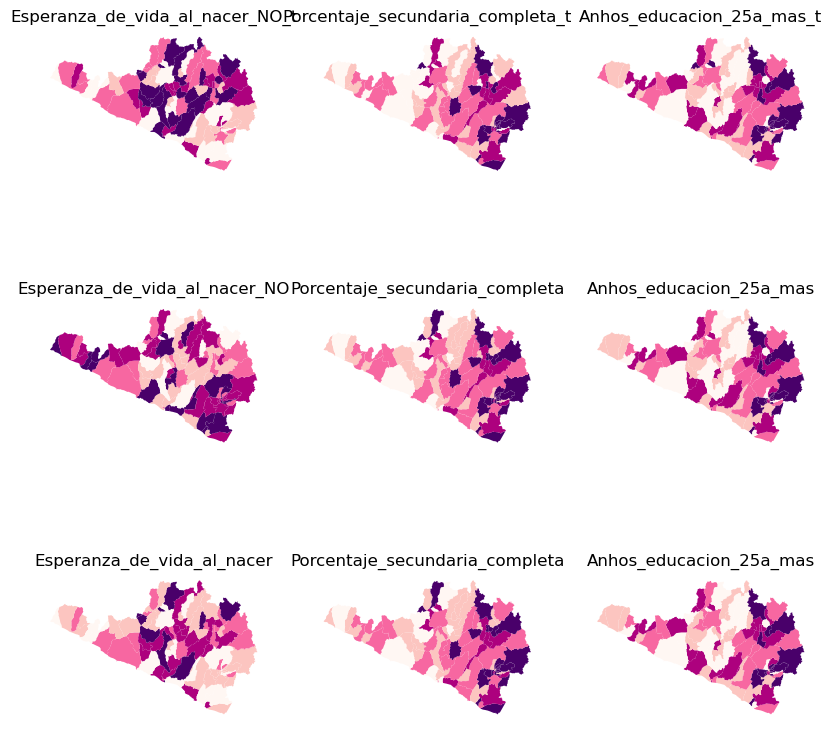

In [61]:
#Finalmente graficamos con el esquema seleccionado "JenksCaspall"

f, axs = plt.subplots( ncols=3, nrows=3,figsize=(10, 10))
axs = axs.flatten()
# Comenzamos con un loop
for i, col in enumerate(sel_var_new_t + sel_var_new + sel_var):
    # Seleccionamos el eje donde irá el mapa
    ax = axs[i]
    # Plot
    mp_distrit_AREQUIPA.plot(
        column=col,
        ax=ax,
        scheme="JenksCaspall",
        linewidth=0,
        cmap="RdPu",
    )
    # Eliminamos el desorden
    ax.set_axis_off()
    # Estableciendo el título 
    ax.set_title(col)
# Observamos el gráfico
plt.show()

In [62]:
# Actualizamos
mp_distrit_AREQUIPA.to_file(os.path.join('maps',"dataMapArequipa.gpkg"), layer='distritos', driver="GPKG")

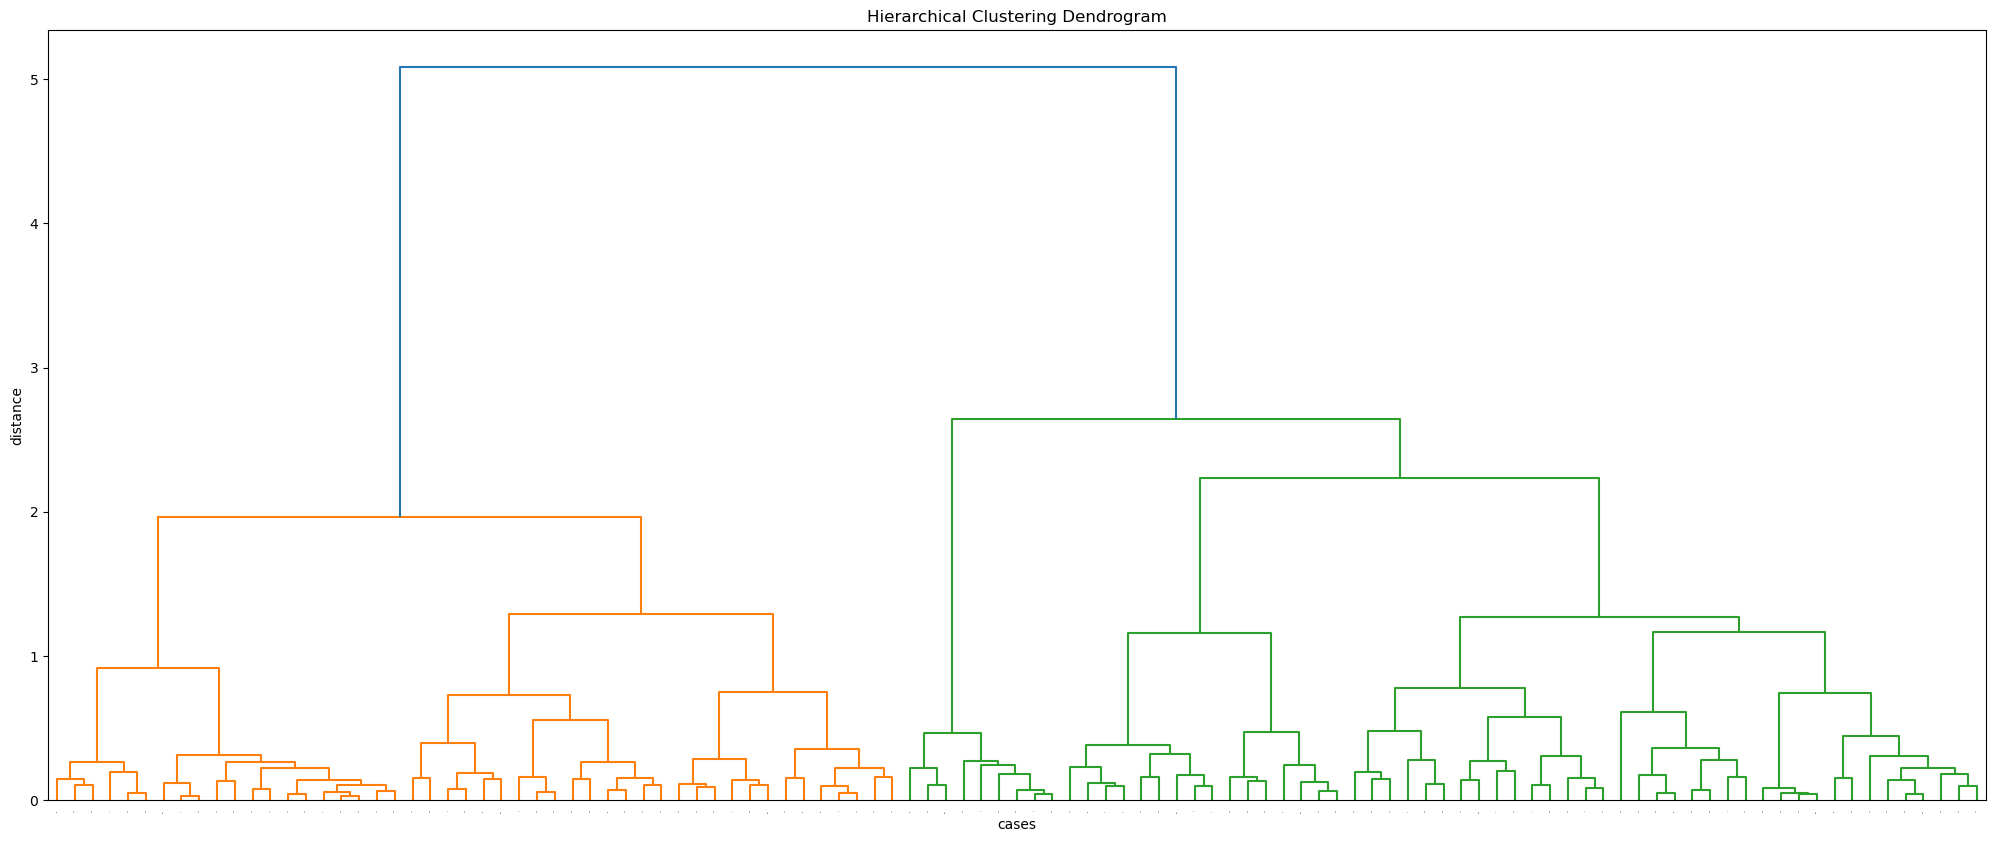

In [63]:
#Ejercicio 4 

from scipy.cluster import hierarchy as hc


Z = hc.linkage(qt_result, 'ward')
# Calculamos el dendograma --> Evalúa la distancia, que tan cercano/lejano es uno del otro (similitud)
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('cases')
plt.ylabel('distance')
hc.dendrogram(
    Z,
    leaf_rotation=90.,  # Rotamos las etiquetas del eje x
    leaf_font_size=1,  
)
plt.show()

In [65]:
from sklearn.cluster import AgglomerativeClustering as agnes

np.random.seed(12345)
               
# Analizando el algoritmo, escogemos 5 clusters
model = agnes(linkage="ward", n_clusters=5).fit(mp_distrit_AREQUIPA[sel_var_new_t])
# Asignamos etiquetas a la tabla de datos principales
mp_distrit_AREQUIPA.loc[:, "hc_5"] = model.labels_

C:\Users\lizbe\anaconda3\envs\geopandas_env\Lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [ ]:
#Vemos los value_counts
mp_distrit_AREQUIPA["hc_5"].value_counts()

In [ ]:
mp_distrit_AREQUIPA.groupby("hc_5")[sel_var_new].mean()

In [ ]:
#Podría perfilar mejor los clusters si preparo un gráfico con todas las variables
#Nuevo formato long --> Valor como nueva columna

mp_distrit_AREQUIPA_long = mp_distrit_AREQUIPA.set_index("hc_5").copy()
# Solo lo usado para el cluster
mp_distrit_AREQUIPA_long = mp_distrit_AREQUIPA_long[sel_var_new]
# Obteniendo la "long" version de nuestros datos
mp_distrit_AREQUIPA_long = mp_distrit_AREQUIPA_long.stack()
# Índices adecuados
mp_distrit_AREQUIPA_long = mp_distrit_AREQUIPA_long.reset_index()
# Renombrando el nombre d elas columnas
mp_distrit_AREQUIPA_long = mp_distrit_AREQUIPA_long.rename(
    columns={"level_1": "Attribute", 0: "Values"}
)
# Vemos el resultado
mp_distrit_AREQUIPA_long.head()

In [ ]:
# Configurando
facets = sea.FacetGrid(
    data=mp_distrit_AREQUIPA_long,
    col="hc_5",
    hue="Attribute",
    sharey=False,
    sharex=False,
    aspect=2,
    col_wrap=3,
)
# Hacemos plot
facets.map(sea.kdeplot, "Values", fill=True).add_legend()

In [ ]:
# Configurando la figura
f, ax = plt.subplots(1, figsize=(9, 9))
# Leyenda sin líneas
mp_distrit_AREQUIPA.plot(
    column="hc_5", categorical=True, legend=True, linewidth=0, ax=ax
)
# Removemos los axis (ejes)
ax.set_axis_off()
# Plot
plt.show()

In [ ]:
#EJERCICIO 5

from libpysal.weights import Queen, Rook, KNN

# rook (líneas - aristas)
w_rook = Rook.from_dataframe(mp_distrit_AREQUIPA) 

In [ ]:
# queen (puntos)
w_queen = Queen.from_dataframe(mp_distrit_AREQUIPA)

In [ ]:
# Para k=4, vecindarios cercanos
w_knn = KNN.from_dataframe(mp_distrit_AREQUIPA, k=4)

In [ ]:
# La cantidad de filas que se muestra en "mp_distrit_AREQUIPA"
mp_distrit_AREQUIPA.head(1)

In [ ]:
# Cantidad de vecindarios del distrito
w_rook.neighbors[27] 

In [ ]:
# Observamos
base=mp_distrit_AREQUIPA[mp_distrit_AREQUIPA.PROVINCIA=="ISLAY"].plot()
mp_distrit_AREQUIPA.iloc[w_rook.neighbors[27] ,].plot(ax=base,facecolor="yellow")
mp_distrit_AREQUIPA.head(1).plot(ax=base,facecolor="red")

In [ ]:
w_queen.neighbors[27]

In [ ]:
base=mp_distrit_AREQUIPA[mp_distrit_AREQUIPA.PROVINCIA=="ISLAY"].plot()
mp_distrit_AREQUIPA.iloc[w_queen.neighbors[27] ,].plot(ax=base,facecolor="yellow")
mp_distrit_AREQUIPA.head(1).plot(ax=base,facecolor="red")

In [ ]:
w_knn.neighbors[27]

In [ ]:
base=mp_distrit_AREQUIPA[mp_distrit_AREQUIPA.PROVINCIA=="ISLAY"].plot()
mp_distrit_AREQUIPA.iloc[w_knn.neighbors[27],].plot(ax=base,facecolor="yellow")
mp_distrit_AREQUIPA.head(1).plot(ax=base,facecolor="red")

In [ ]:
# Todos los vecindarios por columna
w_knn.neighbors

In [ ]:
# La matriz de los vecindarios 

pd.DataFrame(*w_knn.full()).astype(int) # 1 significa que hay vecindarios

In [ ]:
# Contador de ceros
w_knn.nonzero

In [ ]:
# Densidad
w_knn.pct_nonzero

In [ ]:
# ¿Existe algún distrito sin vecinos?
w_knn.islands

In [ ]:
#EJERCICIO 6

# Transformando datos espaciales
w_knn.transform = 'R'

In [ ]:
#Moran como coeficiente de Pearson e indicador de una correlación
from esda.moran import Moran

#Moran para AE
moranAE = Moran(mp_distrit_AREQUIPA['Anhos_educacion_25a_mas'], w_knn)
moranAE.I,moranAE.p_sim

In [ ]:
#Plot para AE
from splot.esda import moran_scatterplot

fig, ax = moran_scatterplot(moranAE, aspect_equal=True)
ax.set_xlabel('AE_std')
ax.set_ylabel('SpatialLag_AE_std')
plt.show()

In [ ]:
#Moran para PS
moranPS = Moran(mp_distrit_AREQUIPA['Porcentaje_secundaria_completa'], w_knn)
moranPS.I,moranPS.p_sim

In [ ]:
#Plot para PS
fig, ax = moran_scatterplot(moranPS, aspect_equal=True)
ax.set_xlabel('PS_std')
ax.set_ylabel('SpatialLag_PS_std')
plt.show()

In [ ]:
#Moran para EV
moranEV = Moran(mp_distrit_AREQUIPA['Esperanza_de_vida_al_nacer'], w_knn)
moranEV.I,moranEV.p_sim

In [ ]:
#Plot para EV
fig, ax = moran_scatterplot(moranEV, aspect_equal=True)
ax.set_xlabel('EV_std')
ax.set_ylabel('SpatialLag_EV_std')
plt.show()

In [ ]:
#Moran para IF
moranIF = Moran(mp_distrit_AREQUIPA['Ingreso_Familiar_per_capita'], w_knn)
moranIF.I,moranIF.p_sim

In [ ]:
#Plot para IF
fig, ax = moran_scatterplot(moranIF, aspect_equal=True)
ax.set_xlabel('IF_std')
ax.set_ylabel('SpatialLag_IF_std')
plt.show()

In [ ]:
#EJERCICIO 7

# El scatterplot with local info
from esda.moran import Moran_Local

# El mejor Moran para la gráfica, es PS
lisaPS = Moran_Local(y=mp_distrit_AREQUIPA['Porcentaje_secundaria_completa'], w=w_knn,seed=2022)
fig, ax = moran_scatterplot(lisaPS,p=0.05)
ax.set_xlabel('PS_std')
ax.set_ylabel('SpatialLag_PS_std')
plt.show()

In [ ]:
# El mapa con los spots y outliers

from splot.esda import lisa_cluster
f, ax = plt.subplots(1, figsize=(12, 12))
plt.title('Spots and Outliers')
fig = lisa_cluster(lisaPS, 
                   mp_distrit_AREQUIPA,ax=ax,
                   legend_kwds={'loc': 'center left', 
                                'bbox_to_anchor': (0.7, 0.6)})
plt.show()

In [ ]:
#Cuadrante
lisaPS.q

In [ ]:
# Significado
lisaPS.p_sim

In [ ]:
# Quadrante para: 1 HH,  2 LH,  3 LL,  4 HL
pd.Series(lisaPS.q).value_counts()

In [ ]:
mp_distrit_AREQUIPA['PS_quadrant']=[l if p <0.05 else 0 for l,p in zip(lisaPS.q,lisaPS.p_sim)  ]
mp_distrit_AREQUIPA['PS_quadrant'].value_counts()

In [ ]:
labels = [ '0 no_sig', '1 hotSpot', '2 coldOutlier', '3 coldSpot', '4 hotOutlier']

mp_distrit_AREQUIPA['PS_quadrant_names']=[labels[i] for i in mp_distrit_AREQUIPA['PS_quadrant']]

mp_distrit_AREQUIPA['PS_quadrant_names'].value_counts()

In [ ]:
from matplotlib import colors
myColMap = colors.ListedColormap([ 'ghostwhite', 'red', 'green', 'black','orange'])


# Configuramos
f, ax = plt.subplots(1, figsize=(12,12))
# Plot 
# Leyenda

plt.title('Spots and Outliers')

mp_distrit_AREQUIPA.plot(column='PS_quadrant_names', 
                categorical=True,
                cmap=myColMap,
                linewidth=0.1, 
                edgecolor='white',
                legend=True,
                legend_kwds={'loc': 'center left', 
                             'bbox_to_anchor': (0.7, 0.6)},
                ax=ax)
# Removiendo ejes
ax.set_axis_off()
# Graficamos
plt.show()

In [ ]:
# Actualizando
mp_distrit_AREQUIPA.to_file(os.path.join('maps',"dataMapArequipa.gpkg"), layer='distritos', driver="GPKG")